In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gadi = False

In [87]:
if gadi:
    base_dir = '/g/data/wr45/'
else:
    base_dir = 'https://dapds00.nci.org.au/thredds/dodsC/wr45/'
base_dir += 'ops_aps3/access-g/1/'

In [100]:
years = [2020, 2021]
datetimes = np.arange(
    np.datetime64('{}-10-01'.format(years[0])), 
    np.datetime64('{}-05-01'.format(years[0]+1)),
    np.timedelta64(6, 'h'))

In [113]:
u_fc_list = []
v_fc_list = []
u_an_list = []
v_an_list = []

for dt in datetimes[0:10]:

    print('Getting {} data.'.format(dt))
    fc_date_str = str(fc_data_datetime)[0:10].replace('-', '')
    
    date = str(dt)[0:10].replace('-', '')
    hour = str(dt)[11:13].replace('-', '') + '00'

    u_an = xr.open_dataset(
        base_dir + date + '/' + hour + '/an/sfc/uwnd10m.nc')
    v_an = xr.open_dataset(
        base_dir + date + '/' + hour + '/an/sfc/vwnd10m.nc')
    
    import pdb; pdb.set_trace()

    an_datetime = np.datetime64(
        '{}-{}-{}T{}:00:00'.format(date[0:4], date[4:6], date[6:], hour[:2]))
    fc_data_datetime = an_datetime - np.timedelta64(1, 'D')
    fc_date_str = str(fc_data_datetime)[0:10].replace('-', '')

    u_fc = xr.open_dataset(
        base_dir + fc_date_str + '/' + '1200' + '/fc/sfc/uwnd10m.nc')
    v_fc = xr.open_dataset(
        base_dir + fc_date_str + '/' + '1200' + '/fc/sfc/vwnd10m.nc')

    lon_min = 129
    lon_max = 135
    lat_min = -10
    lat_max = -16

    u_fc = u_fc.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    u_fc = u_fc.sel(time=an_datetime)
    v_fc = v_fc.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    v_fc = v_fc.sel(time=an_datetime)
    u_an = u_an.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    v_an = v_an.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    
    u_fc_list.append(u_fc)
    v_fc_list.append(v_fc)
    u_an_list.append(u_an)
    v_an_list.append(u_an)

Getting 2020-10-01T00 data.
> /tmp/ipykernel_12744/459704969.py(21)<module>()
     19     import pdb; pdb.set_trace()
     20 
---> 21     an_datetime = np.datetime64(
     22         '{}-{}-{}T{}:00:00'.format(date[0:4], date[4:6], date[6:], hour[:2]))
     23     fc_data_datetime = an_datetime - np.timedelta64(1, 'D')

ipdb> v_an
<xarray.Dataset>
Dimensions:       (lat: 1537, lon: 2048, time: 1)
Coordinates:
  * time          (time) datetime64[ns] 2020-10-01
  * lat           (lat) float32 90.0 89.88 89.77 89.65 ... -89.77 -89.88 -90.0
  * lon           (lon) float32 0.08789 0.2637 0.4395 ... 359.6 359.7 359.9
Data variables:
    forc_minutes  (time) timedelta64[ns] ...
    vwnd10m       (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.5,ACDD-1.3
    institution:                     Australian Bureau of Meteorology
    source:                          APS3
    date_created:                    20201002
    summary:                         analysis dat

BdbQuit: 

In [109]:
u_fc_all = xr.concat(u_fc_list, dim='time')

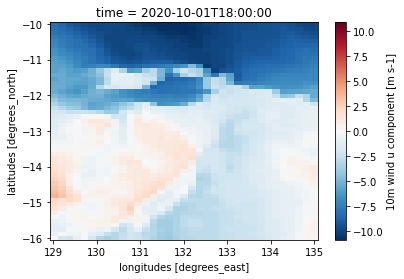

In [95]:
u_fc['uwnd10m'].plot()

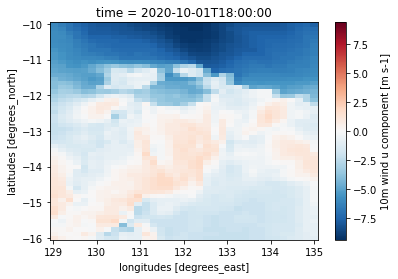

In [96]:
u_an['uwnd10m'].plot()

In [42]:
date[4:6]

'10'

In [34]:
p_fcmm = xr.open_dataset(base_dir + date + '/' + hour + '/fcmm/ml/pressure.nc')

In [62]:
an_datetime

numpy.datetime64('2020-10-01T00:00:00')

In [22]:
z = u_fc.A_rho + u_fc.B_rho * topog['topog']

In [72]:
u_fc

<xarray.Dataset>
Dimensions:       (lat: 86, lon: 68, time: 240)
Coordinates:
  * time          (time) datetime64[ns] 2020-09-30T13:00:00 ... 2020-10-10T12...
  * lat           (lat) float32 -8.027 -8.145 -8.262 ... -17.75 -17.87 -17.99
  * lon           (lon) float32 127.1 127.3 127.4 127.6 ... 138.5 138.7 138.9
Data variables:
    forc_minutes  (time) timedelta64[ns] ...
    uwnd10m       (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.5,ACDD-1.3
    institution:                     Australian Bureau of Meteorology
    source:                          APS3
    date_created:                    20201001
    summary:                         forecast data
    title:                           forecast data
    base_date:                       20200930
    base_time:                       1200
    modl_vrsn:                       ACCESS-G
    expt_id:                         0001
    DODS_EXTRA.Unlimited_Dimension:  time